## TASK 1
#### Author : Shayan Chakraborty

## Prediction Using Supervised Machine Learning

### Objective : Predict the percentage of an student based on the no.of study hours


In [1]:
#importing necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading data from the url given

url = 'http://bit.ly/w-data'
df = pd.read_csv(url)

In [3]:
#displaying first 5 entries in dataset

df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#describing the data

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#checking whether dataset contains any empty value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


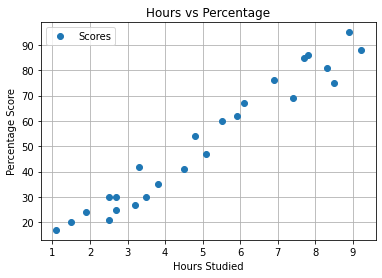

In [7]:
#Plotting the distribution of scores

df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid(True)
plt.show()

#### This the perfect example of linear regression

## Preparing Data

### Now divide the Data into 'train' and 'test' data.

In [8]:
x = df.iloc[:, : 1].values
y = df.iloc[:, 1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
# Training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

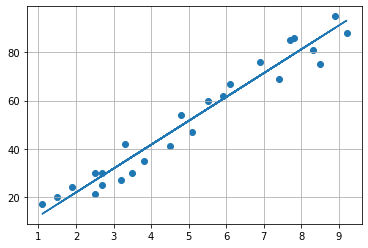

In [13]:
# Plotting the regression line

line = regressor.coef_*x+regressor.intercept_

#Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.grid(True)
plt.show()

## Making Predictions using test_data

In [14]:
print(X_test) #Testing data in hrs
y_pred = regressor.predict(X_test) #predicting scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
#Comparing actual vs predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
#Testing with our own data
hours = [8.55]
ans = regressor.predict([hours])
print("no of hours = {}".format(hours))
print("Predicted Score = {}".format(ans[0]))

no of hours = [8.55]
Predicted Score = 86.75427295092581


## Model Evaluation

In [19]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 4.183859899002975


### So if the model gets a error less than 4 the model is more efficient and if the error is more than 4 than the model is less efficient.